In [8]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv("data/index/SW-Last5Years.csv")

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2328 entries, 0 to 2327
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DATE                2328 non-null   object 
 1   BSRN                2328 non-null   int64  
 2   ND                  2328 non-null   int64  
 3   KP1                 2137 non-null   float64
 4   KP2                 2137 non-null   float64
 5   KP3                 2137 non-null   float64
 6   KP4                 2137 non-null   float64
 7   KP5                 2137 non-null   float64
 8   KP6                 2137 non-null   float64
 9   KP7                 2137 non-null   float64
 10  KP8                 2137 non-null   float64
 11  KP_SUM              2137 non-null   float64
 12  AP1                 2137 non-null   float64
 13  AP2                 2137 non-null   float64
 14  AP3                 2137 non-null   float64
 15  AP4                 2137 non-null   float64
 16  AP5   

In [11]:
df.head(10)

,DATE,BSRN,ND,KP1,KP2,KP3,KP4,KP5,KP6,KP7,...,CP,C9,ISN,F10.7_OBS,F10.7_ADJ,F10.7_DATA_TYPE,F10.7_OBS_CENTER81,F10.7_OBS_LAST81,F10.7_ADJ_CENTER81,F10.7_ADJ_LAST81
0,2020-01-01,2542,22,3.0,0.0,0.0,7.0,7.0,13.0,10.0,...,0.0,0.0,6,71.8,69.4,OBS,71.4,69.7,69.2,68.1
1,2020-01-02,2542,23,0.0,0.0,3.0,3.0,3.0,7.0,10.0,...,0.0,0.0,12,71.9,69.5,OBS,71.4,69.8,69.2,68.2
2,2020-01-03,2542,24,7.0,10.0,27.0,20.0,10.0,7.0,3.0,...,0.2,1.0,13,71.2,68.9,OBS,71.4,69.9,69.2,68.2
3,2020-01-04,2542,25,17.0,7.0,7.0,7.0,10.0,20.0,23.0,...,0.2,1.0,12,72.2,69.8,OBS,71.4,69.9,69.2,68.3
4,2020-01-05,2542,26,17.0,10.0,17.0,13.0,20.0,20.0,33.0,...,0.4,2.0,14,71.8,69.4,OBS,71.4,70.0,69.2,68.3
5,2020-01-06,2542,27,33.0,30.0,17.0,3.0,7.0,10.0,23.0,...,0.4,2.0,7,70.5,68.1,OBS,71.4,70.0,69.2,68.3
6,2020-01-07,2543,1,10.0,17.0,10.0,3.0,7.0,10.0,13.0,...,0.2,1.0,4,71.6,69.3,OBS,71.4,70.1,69.2,68.4
7,2020-01-08,2543,2,10.0,10.0,3.0,3.0,17.0,27.0,17.0,...,0.3,1.0,4,73.7,71.2,OBS,71.4,70.2,69.2,68.4
8,2020-01-09,2543,3,27.0,30.0,37.0,23.0,17.0,23.0,23.0,...,0.6,3.0,15,74.4,71.9,OBS,71.4,70.3,69.3,68.5
9,2020-01-10,2543,4,10.0,7.0,23.0,23.0,17.0,17.0,13.0,...,0.3,1.0,4,72.8,70.4,OBS,71.4,70.4,69.3,68.6


In [12]:
#DATE列をdatetime64型に変換
#errorsをNaT(欠損値)として扱う
df["DATE"] = pd.to_datetime(df["DATE"], errors="coerce")

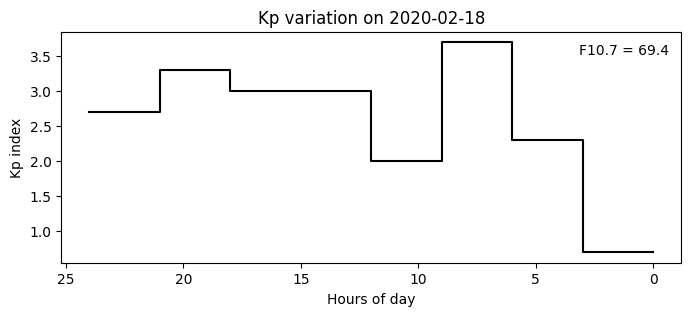

In [17]:
the_day = df[df["DATE"] == "2020-02-18"].iloc[0]
kp_values = the_day[["KP1","KP2","KP3","KP4","KP5","KP6","KP7","KP8"]].astype(float).values / 10.0

hours = [0,3,6,9,12,15,18,21,24]

plt.figure(figsize=(8,3))
plt.step(hours, list(kp_values)+[kp_values[-1]], where="post", color="black")
plt.gca().invert_xaxis()

plt.xlabel("Hours of day")
plt.ylabel("Kp index")
plt.title("Kp variation on 2020-02-18")

# F10.7値を右上に注釈
f107 = the_day["F10.7_ADJ"]  # or F10.7_OBS
plt.text(0.98, 0.95, f"F10.7 = {f107:.1f}", transform=plt.gca().transAxes,
         ha="right", va="top", fontsize=10, bbox=dict(facecolor="white", alpha=0.7, edgecolor="none"))


plt.show()